In [25]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Flatten
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA


In [26]:
def preprocess_images(file_paths):
    images = []
    for file_path in file_paths:
        img = load_img(file_path, target_size=(128, 128))  
        img_array = img_to_array(img) / 255.0
        images.append(img_array)
    return np.array(images)

In [27]:
def load_dataset(root_folder):
    data = []
    labels = []

    for subdir in os.listdir(root_folder):
        subdir_path = os.path.join(root_folder, subdir)

        if os.path.isdir(subdir_path):
            for file in os.listdir(subdir_path):
                if file.endswith('.txt'):
                
                    assignment_file_path = os.path.join(subdir_path, file)
                    with open(assignment_file_path, 'r') as f:
                        label = int(f.read().strip())

                    image_file_path = os.path.join(subdir_path, file.replace('_assignment.txt', '.jpg').replace('.txt', '.jpg'))

                    data.append(image_file_path)
                    labels.append(label)

    return pd.DataFrame({'file_path': data, 'label': labels})


In [ ]:
dataset_folder = '/home/pavel/dev/n-n-cars-prediction/Insight-MVT_Annotation_Train'
dataset_df = load_dataset(dataset_folder)

X = preprocess_images(dataset_df['file_path'].values)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(dataset_df['label'])

In [ ]:
#splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#reshaping input for model
X_train = X_train.reshape((X_train.shape[0], 128, 128 * 3))
X_test = X_test.reshape((X_test.shape[0], 128, 128 * 3))

In [ ]:
#LSTM model
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='linear'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

y_pred = model.predict(X_test)

Epoch 1/10


2024-01-18 07:51:16.802508: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1052246016 exceeds 10% of free system memory.


168/168 [==============================] - 12s 63ms/step - loss: 9.6867 - val_loss: 5.5135
Epoch 2/10
168/168 [==============================] - 10s 59ms/step - loss: 6.0191 - val_loss: 7.5129
Epoch 3/10
168/168 [==============================] - 10s 60ms/step - loss: 5.8049 - val_loss: 4.2037
Epoch 4/10
168/168 [==============================] - 10s 60ms/step - loss: 4.9064 - val_loss: 4.0911
Epoch 5/10
168/168 [==============================] - 10s 60ms/step - loss: 4.3934 - val_loss: 3.7302
Epoch 6/10
168/168 [==============================] - 10s 59ms/step - loss: 4.1254 - val_loss: 3.6186
Epoch 7/10
168/168 [==============================] - 10s 60ms/step - loss: 3.8463 - val_loss: 3.4093
Epoch 8/10
168/168 [==============================] - 10s 60ms/step - loss: 3.6979 - val_loss: 3.2325
Epoch 9/10
168/168 [==============================] - 10s 59ms/step - loss: 3.6395 - val_loss: 3.3204
Epoch 10/10
53/53 [==============================] - 2s 26ms/step


(1673, 1)


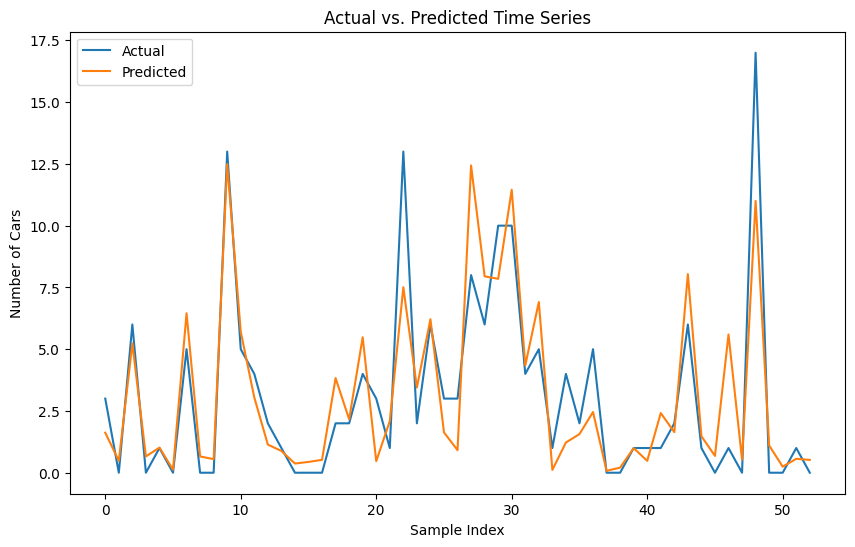

In [43]:
plt.figure(figsize=(10, 6)) 
plt.plot(y_test[0::32], label='Actual')
print(y_pred.shape)
plt.plot(y_pred[0::32], label='Predicted')
plt.legend()
plt.title('Actual vs. Predicted Time Series')
plt.xlabel('Sample Index')
plt.ylabel('Number of Cars')
plt.show()

In [ ]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

y_pred = model.predict(X_test)

Epoch 1/20
  2/168 [..............................] - ETA: 9s - loss: 2.8758 

2024-01-18 07:59:40.588254: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1052246016 exceeds 10% of free system memory.


168/168 [==============================] - 10s 61ms/step - loss: 3.9693 - val_loss: 3.1500
Epoch 2/20
168/168 [==============================] - 10s 60ms/step - loss: 3.4302 - val_loss: 3.1911
Epoch 3/20
168/168 [==============================] - 10s 60ms/step - loss: 3.4409 - val_loss: 3.8109
Epoch 4/20
168/168 [==============================] - 10s 59ms/step - loss: 3.4743 - val_loss: 3.1258
Epoch 5/20
168/168 [==============================] - 10s 61ms/step - loss: 3.1240 - val_loss: 2.8712
Epoch 6/20
168/168 [==============================] - 10s 61ms/step - loss: 2.9203 - val_loss: 2.9605
Epoch 7/20
168/168 [==============================] - 10s 60ms/step - loss: 3.0085 - val_loss: 2.9756
Epoch 8/20
168/168 [==============================] - 10s 60ms/step - loss: 3.1082 - val_loss: 2.8655
Epoch 9/20
168/168 [==============================] - 10s 60ms/step - loss: 2.9194 - val_loss: 2.8762
Epoch 10/20
168/168 [==============================] - 10s 61ms/step - loss: 2.9638 - val_los

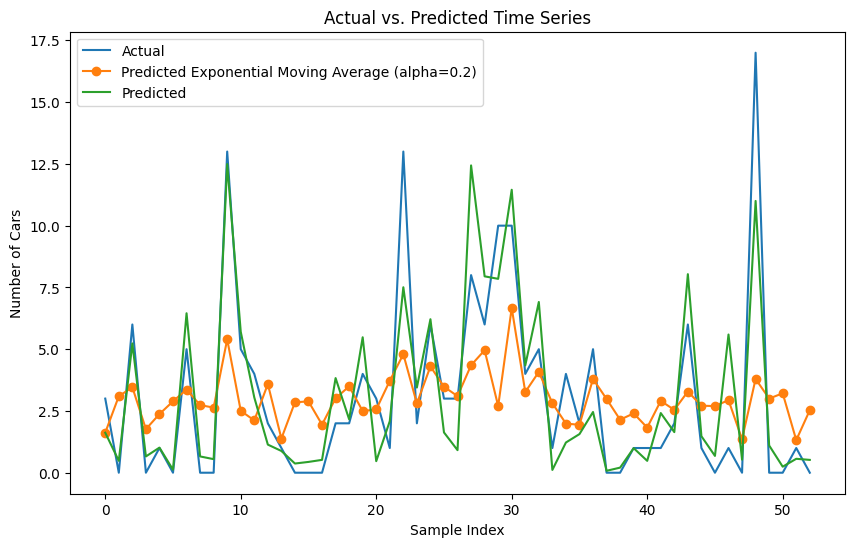

In [44]:
def exponential_moving_average(data, alpha):
    ema = [data[0]]

    for i in range(1, len(data)):
        ema_value = alpha * (data[i] - ema[i-1]) + ema[i-1]
        ema.append(ema_value)

    return ema


alpha = 0.2

ema_values = exponential_moving_average(y_pred, alpha)

plt.figure(figsize=(10, 6)) 
plt.plot(y_test[0::32], label='Actual')
plt.plot(ema_values[::32], label=f'Predicted Exponential Moving Average (alpha={alpha})', linestyle='-', marker='o')
plt.plot(y_pred[0::32], label='Predicted')
plt.legend()
plt.title('Actual vs. Predicted Time Series')
plt.xlabel('Sample Index')
plt.ylabel('Number of Cars')
plt.show()